-------------------------------
#### Evaluating the quality of generated samples for mnist
-----------------------------

#### Load model from saved artifacts

In [1]:
import torch
import torch.nn as nn

In [2]:
# Generator Network
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Tanh()
        )

    def forward(self, x):
        img = self.model(x)
        img = img.view(img.size(0), 1, 28, 28)
        return img

In [3]:
# Initialize the networks
#discriminator = Discriminator()
generator     = Generator()

In [4]:
# Load the GAN model
checkpoint = torch.load('./model/gan_model_mnist.pt')

generator.load_state_dict(checkpoint['generator_state_dict'])
#discriminator.load_state_dict(checkpoint['discriminator_state_dict'])

<All keys matched successfully>

In [5]:
# Set the generator network to evaluation mode
generator.eval()

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
    (5): Tanh()
  )
)

In [19]:
import matplotlib.pyplot as plt

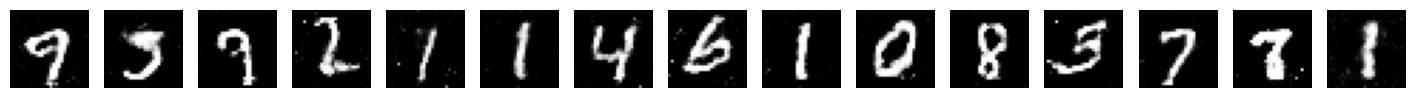

In [18]:
# Generate new samples
num_samples = 15
z = torch.randn(num_samples, 100)  # Generate random noise as input

with torch.no_grad():
    generated_samples = generator(z)
    
fig, axes = plt.subplots(1, num_samples, figsize=(18, 3))

generated_samples_view = generated_samples.view(-1, 28, 28)

for i, ax in enumerate(axes):
    
    ax.axis('off')
    
    ax.imshow(generated_samples_view[i], cmap='gray')